In [2]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))

print(tf.__version__)

2.11.0


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Eamon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# set model parameters
vocab_size = 10000
embedding_dim = 64
max_length = 200
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

In [4]:
import pandas as pd
corpus = pd.read_csv(r"C:\Users\Eamon\Downloads\text_master.csv")
corpus

,labels,big_text
0,0,hopson a bill to be entitled an act relating ...
1,0,hochberg a bill to be entitled an act relatin...
2,0,crabb a bill to be entitled an act relating t...
3,0,morrison a bill to be entitled an act relatin...
4,1,mccall a bill to be entitled an act relating ...
...,...,...
44034,1,morales of maverick hb a noa 4667 a bill to ...
44035,1,murr hb a noa 4668 a bill to be entitled an ...
44036,1,cain hb a noa 4669 a bill to be entitled an ...
44037,0,capriglione hb a noa 4670 a bill to be entit...


In [5]:
# remove all null/blank text references in case they cause error
indices_remove = []
for x in range(len(corpus['big_text'])):
    if(not isinstance(corpus.iloc[x]['big_text'], str)):
        indices_remove.append(x)
        #print(corpus.iloc[x]['big_text'])
        
#indices_remove

In [6]:
for x in indices_remove:
    corpus = corpus.drop(index=x)

In [7]:
indices_remove = []
for x in range(len(corpus['big_text'])):
    if(not isinstance(corpus.iloc[x]['big_text'], str)):
        indices_remove.append(x)
        print(corpus.iloc[x]['big_text'])
        
indices_remove

[]

In [8]:
corpus.to_csv("local_text_master.csv", index=False)

In [9]:
# quick and dirty fix to field larger than field limit error
import sys
import csv
maxInt = sys.maxsize

while True:
    # decrease the maxInt value by factor 10 
    # as long as the OverflowError occurs.

    try:
        csv.field_size_limit(maxInt)
        break
    except OverflowError:
        maxInt = int(maxInt/10)

In [10]:
# shuffle dataset
corpus = pd.read_csv("local_text_master.csv")
corpus

,labels,big_text
0,0,hopson a bill to be entitled an act relating ...
1,0,hochberg a bill to be entitled an act relatin...
2,0,crabb a bill to be entitled an act relating t...
3,0,morrison a bill to be entitled an act relatin...
4,1,mccall a bill to be entitled an act relating ...
...,...,...
44002,1,morales of maverick hb a noa 4667 a bill to ...
44003,1,murr hb a noa 4668 a bill to be entitled an ...
44004,1,cain hb a noa 4669 a bill to be entitled an ...
44005,0,capriglione hb a noa 4670 a bill to be entit...


In [23]:
shuffled = corpus.sample(frac=1, random_state=1).reset_index()
shuffled = shuffled.drop(['index'], axis=1)
shuffled.to_csv("shuffled_text_master.csv", index=False)

In [32]:
df = pd.read_csv("shuffled_text_master.csv")

In [33]:
df

,labels,big_text
0,0,parker a bill to be entitled an act relating ...
1,0,gallego a bill to be entitled an act relating...
2,0,thompson of harris hb a noa 834 a bill to be...
3,0,bailey a bill to be entitled an act relating ...
4,0,bucy hb a noa 2061 a bill to be entitled an ...
...,...,...
44002,0,slawson hb a noa 4386 a bill to be entitled ...
44003,1,phillips a bill to be entitled an act relatin...
44004,0,madden a bill to be entitled an act relating ...
44005,0,pickett a bill to be entitled an act relating...


In [24]:
articles = []
labels = []

with open("shuffled_text_master.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        article = row[1]
        for word in STOPWORDS:
            token = ' ' + word + ' '
            article = article.replace(token, ' ')
            article = article.replace(' ', ' ')
        articles.append(article)
print(len(labels))
print(len(articles))

44007
44007


In [62]:
# average bill length
length_array = []
for article in articles:
    length_array.append(article.count(" "))
    
np.average(length_array)
# should be 600ish
np.argmax(length_array)
np.median(length_array)

225.0

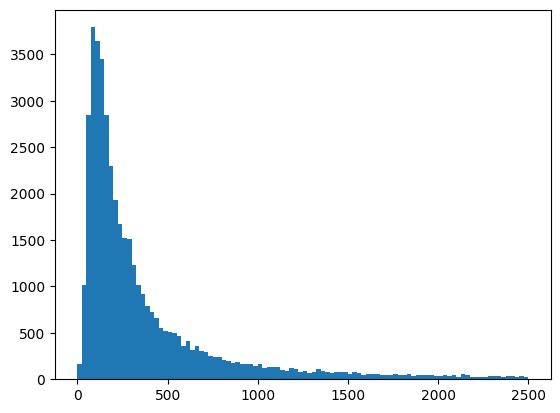

In [61]:
import matplotlib.pyplot as plt
plt.hist(length_array, bins=100, range=(0, 2500))
plt.show()

In [39]:
# average bill standard deviation
np.std(length_array)
#should be 2000ish

2781.405309749653

In [41]:
train_size = int(len(articles) * training_portion)

train_articles = articles[0: train_size]
train_labels = labels[0: train_size]

validation_articles = articles[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_articles))
print(len(train_labels))
print(len(validation_articles))
print(len(validation_labels))

35205
35205
35205
8802
8802


In [45]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index
dict(list(word_index.items())[100:200])

{'day': 101,
 'system': 102,
 'member': 103,
 'sec': 104,
 'purposes': 105,
 'entity': 106,
 'officer': 107,
 'subject': 108,
 'purpose': 109,
 'report': 110,
 'office': 111,
 'effect': 112,
 'issued': 113,
 'water': 114,
 'facility': 115,
 'a': 116,
 'individual': 117,
 'necessary': 118,
 'requirements': 119,
 'corner': 120,
 'except': 121,
 'authorized': 122,
 'fund': 123,
 'rate': 124,
 'certain': 125,
 'later': 126,
 'line': 127,
 'fee': 128,
 'municipality': 129,
 'business': 130,
 'employee': 131,
 'bonds': 132,
 'applicant': 133,
 'number': 134,
 'attorney': 135,
 'following': 136,
 'vehicle': 137,
 'federal': 138,
 'included': 139,
 'applicable': 140,
 'applies': 141,
 'interest': 142,
 'hb': 143,
 'medical': 144,
 'years': 145,
 'subdivision': 146,
 'directors': 147,
 'action': 148,
 'used': 149,
 'transportation': 150,
 'period': 151,
 'payment': 152,
 'hearing': 153,
 'comptroller': 154,
 'apply': 155,
 'rule': 156,
 'distance': 157,
 '3': 158,
 'include': 159,
 'acts': 160,

In [46]:
train_sequences = tokenizer.texts_to_sequences(train_articles)
print(train_sequences[10])

[5531, 1857, 1917, 80, 61, 9, 58, 2158, 15, 147, 7216, 421, 6298, 947, 89, 125, 745, 84, 53, 4, 12, 1, 88, 50, 2, 10, 13, 11, 1, 1, 232, 261, 89, 15, 147, 856, 535, 17, 21, 89, 209, 129, 189, 533, 22, 89, 24, 535, 114, 226, 189, 25, 533, 89, 651, 71, 146, 23, 535, 114, 6, 189, 27, 533, 89, 251, 171, 145, 26, 103, 307, 103, 4, 30, 53, 471, 569, 6, 1073, 1252, 29, 533, 89, 32, 535, 12, 20, 36, 150, 307, 12, 150, 16, 37]


In [47]:
train_articles[10]

'gonzËœlez el paso  bill entitled act relating composition board directors stormwater control recapture planning authority certain counties enacted legislature state texas section391a004 local government code amended read follows a004board directorsthe governing body authority board directors composed representative county 11 authority located municipality within territory 12 authority 13 representative water utility within 14 territory authority also described subdivision  15 representative water district within 16 territory authority operation least years 18 member appointed member state 19 legislature whose legislative district wholly partly 20 territory authority 21 representative texas department 22 transportation appointed texas transportation commission 23 '

In [63]:
# pad and max our sequences
max_length = 225
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

457
225
240
225
94
225


In [64]:
print(train_padded[10])

[5531 1857 1917   80   61    9   58 2158   15  147 7216  421 6298  947
   89  125  745   84   53    4   12    1   88   50    2   10   13   11
    1    1  232  261   89   15  147  856  535   17   21   89  209  129
  189  533   22   89   24  535  114  226  189   25  533   89  651   71
  146   23  535  114    6  189   27  533   89  251  171  145   26  103
  307  103    4   30   53  471  569    6 1073 1252   29  533   89   32
  535   12   20   36  150  307   12  150   16   37    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [65]:
validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

8802
(8802, 225)


In [66]:
# tokenize our labels
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))
print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

[1]
[1]
[1]
(35205, 1)
[1]
[1]
[1]
(8802, 1)


In [70]:
training_label_seq[0:25]

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [2],
       [2],
       [1]])

In [71]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_article(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(decode_article(train_padded[10]))
print('---')
print(train_articles[10])

gonzëœlez el paso bill entitled act relating composition board directors stormwater control recapture planning authority certain counties enacted legislature state texas <OOV> local government code amended read follows <OOV> <OOV> governing body authority board directors composed representative county 11 authority located municipality within territory 12 authority 13 representative water utility within 14 territory authority also described subdivision 15 representative water district within 16 territory authority operation least years 18 member appointed member state 19 legislature whose legislative district wholly partly 20 territory authority 21 representative texas department 22 transportation appointed texas transportation commission 23 ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?

In [86]:
model = tf.keras.Sequential([
    # Add an Embedding layer expecting input vocab of size 5000, and output embedding dimension of size 64 we set at the top
    tf.keras.layers.Embedding(vocab_size, embedding_dim,  mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
#    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # use ReLU in place of tanh function since they are very good alternatives of each other.
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    # Add a Dense layer with 6 units and softmax activation.
    # When we have multiple outputs, softmax convert outputs layers into a probability distribution.
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 64)          640000    
                                                                 
 bidirectional_4 (Bidirectio  (None, 128)              66048     
 nal)                                                            
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 714,369
Trainable params: 714,369
Non-trainable params: 0
_________________________________________________________________


In [102]:
from keras.regularizers import l2
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, mask_zero=True),
    tf.keras.layers.LSTM(128, dropout=0.2, kernel_regularizer=l2(0.0000001), 
                        activity_regularizer=l2(0.0000001)),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, None, 64)          640000    
                                                                 
 lstm_9 (LSTM)               (None, 128)               98816     
                                                                 
 dense_14 (Dense)            (None, 1)                 129       
                                                                 
Total params: 738,945
Trainable params: 738,945
Non-trainable params: 0
_________________________________________________________________


In [110]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, LSTM, Embedding, Dropout

embedding_vector_features=45

model=Sequential()

model.add(Embedding(vocab_size,embedding_vector_features,input_length=max_length))

model.add(LSTM(128,activation='relu',return_sequences=True))

model.add(Dropout(0.2))

model.add(LSTM(128,activation='relu'))

model.add(Dropout(0.2))

for units in [128,128,64,32]:

    model.add(Dense(units,activation='relu'))

    model.add(Dropout(0.2))

model.add(Dense(32,activation='relu'))

model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

In [75]:
print(set(labels))

{'1', '0'}


In [ ]:
opt = tf.keras.optimizers.Nadam(learning_rate=0.00001, clipnorm=1.0, 
                                clipvalue=0.5)
model.compile(loss='binary_crossentropy', optimizer=opt, 
              metrics=['accuracy'])

early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    monitor="accuracy", patience=5, restore_best_weights=True)

num_epochs = 20
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, 
                    validation_data=(validation_padded, validation_label_seq), 
                    verbose=1)

Epoch 1/20
 139/1101 [==>...........................] - ETA: 4:47 - loss: 0.6894 - accuracy: 0.7527